# Ex. No: 05
#  Implementation of filter & EDGE DETECTION

**Name:** LAVANYA S   **Reg. No:** 212223230112

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the input image
image = cv2.imread('peacock.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

* Convolution in OpenCV

In [3]:
# Define a Kernel
kernel = np.ones((5,5), dtype = np.float32) / 5**2

print (kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


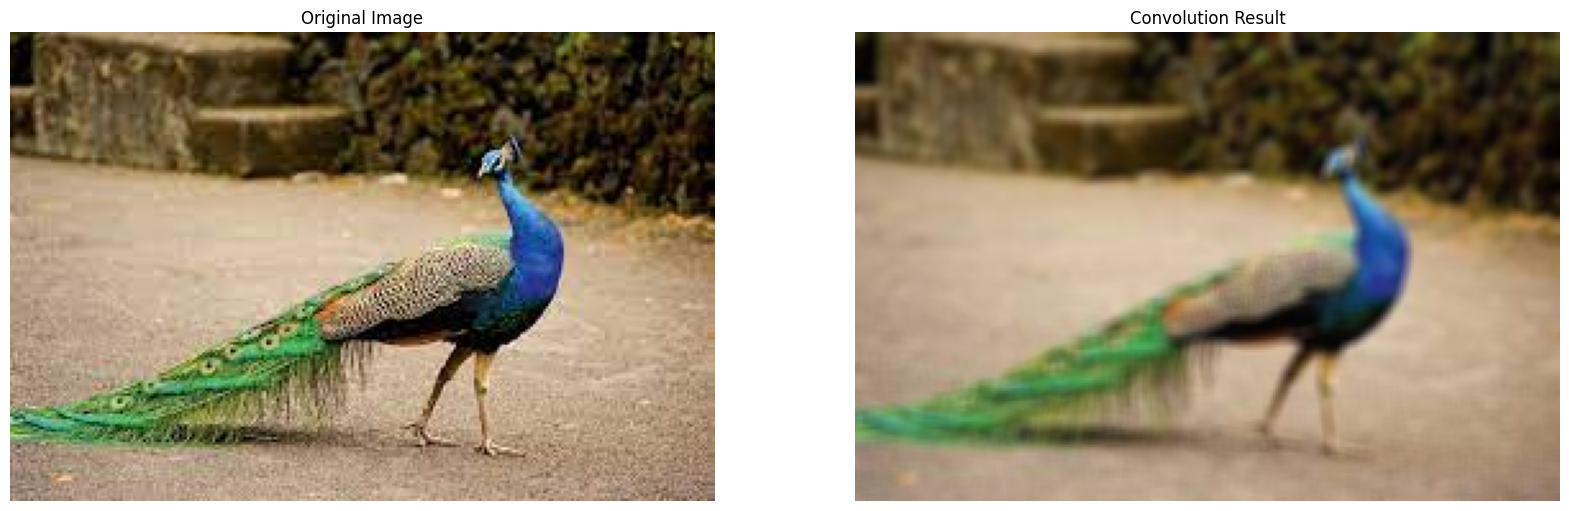

In [4]:
# To Perform Convolution 
image = cv2.imread('peacock.jpeg')

dst = cv2.filter2D(image, ddepth = -1, kernel = kernel)

plt.figure(figsize = [20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(image[:,:,::-1]); plt.title("Original Image")
plt.subplot(122); plt.axis('off'); plt.imshow(dst[:,:,::-1]);   plt.title("Convolution Result");

# 1. Smoothing filter 
-by convolving the image with a 5x5 kernel

# i) Using Averaging Filter

In [5]:
average_filter = cv2.blur(image, (30,30))

Text(0.5, 1.0, 'Output Image ( Average Filter)')

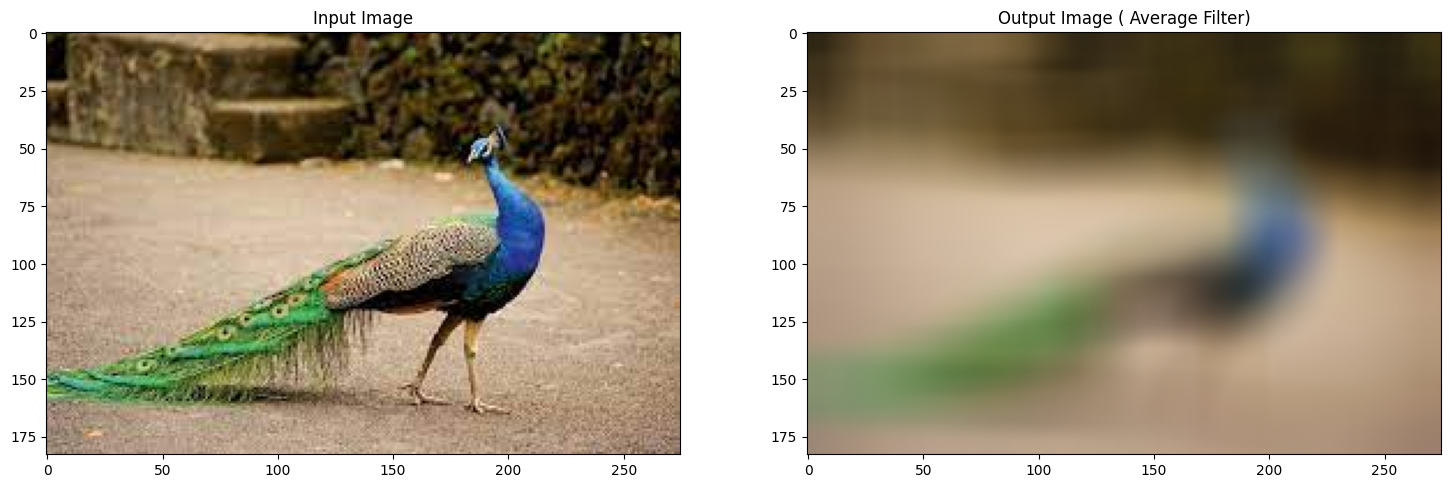

In [6]:
## Display the images.

plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(image [:, :, ::-1]); plt.title('Input Image')
plt.subplot(122); plt.imshow(average_filter[:, :, ::-1]); plt.title('Output Image ( Average Filter)')

# ii) Using Weighted Averaging Filter (custom kernel)   
-  The middle pixel gets the maximum weight while the pixels farther away are given less weight.

- The Gaussian filter follows a specific mathematical distribution (the Gaussian function), while the weighted averaging filter can use arbitrary weights.

In [7]:
kernel = np.array([[1,2,1],
                   [2,4,2],
                   [1,2,1]])/16
weighted_average_filter = cv2.filter2D(image, -1, kernel)

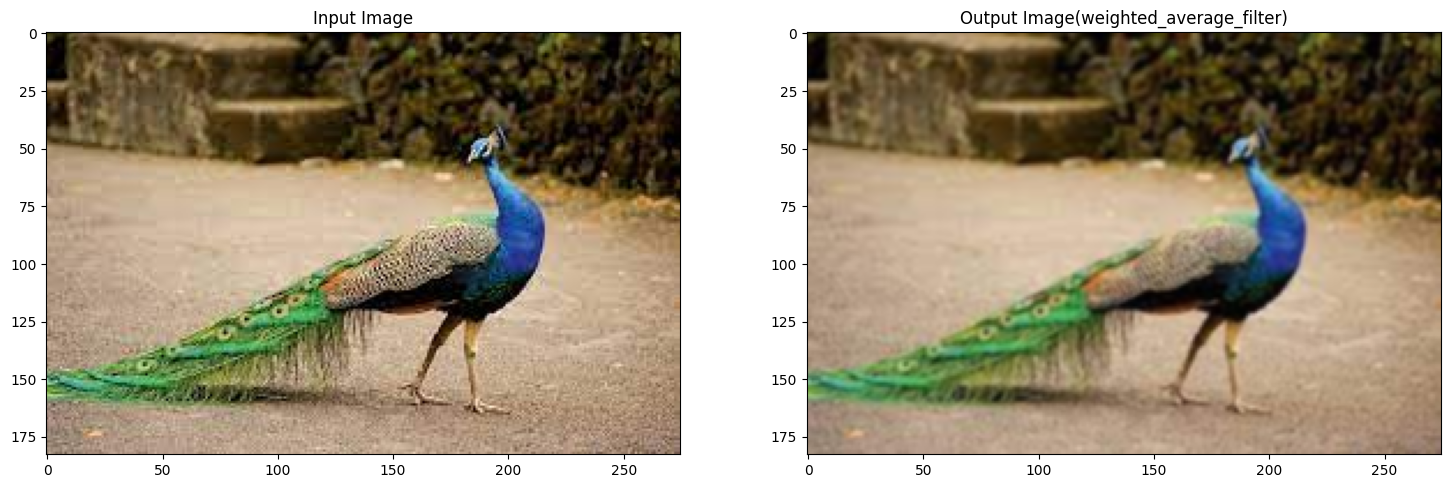

In [8]:
# Display the images.
plt.figure(figsize = (18, 6))
plt.subplot(121);plt.subplot(121); plt.imshow(image [:, :, ::-1]); plt.title('Input Image')
plt.subplot(122);plt.imshow(weighted_average_filter[:, :, ::-1]); plt.title('Output Image(weighted_average_filter)');plt.show()

In [9]:
# Apply Gaussian blur.
gaussian_filter = cv2.GaussianBlur(image, (29,29), 0, 0)

Text(0.5, 1.0, 'Output Image ( Gaussian Filter)')

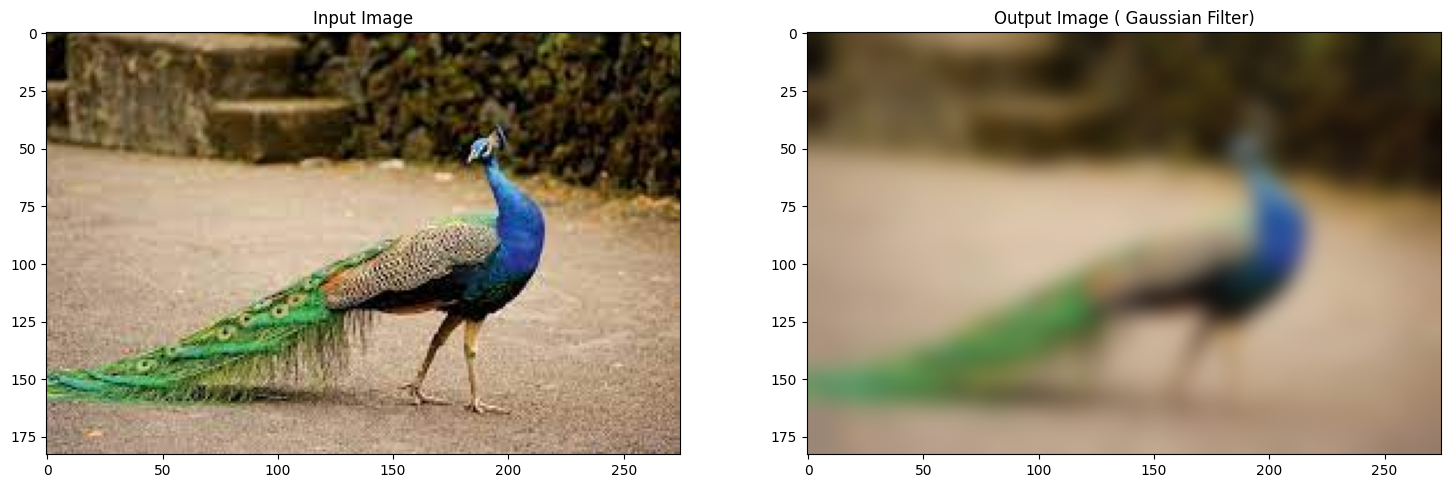

In [10]:
# Display the images.

plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(image [:, :, ::-1]); plt.title('Input Image')
plt.subplot(122); plt.imshow(gaussian_filter[:, :, ::-1]); plt.title('Output Image ( Gaussian Filter)')

In [11]:
# iv) Using Median Filter
median_filter = cv2.medianBlur(image, 19)

-  median filter is often used for removing salt-and-pepper noise (random black-and-white pixels) in an image. It is effective at preserving edges while smoothing out the noise.

Text(0.5, 1.0, 'Output Image ( Median_filter)')

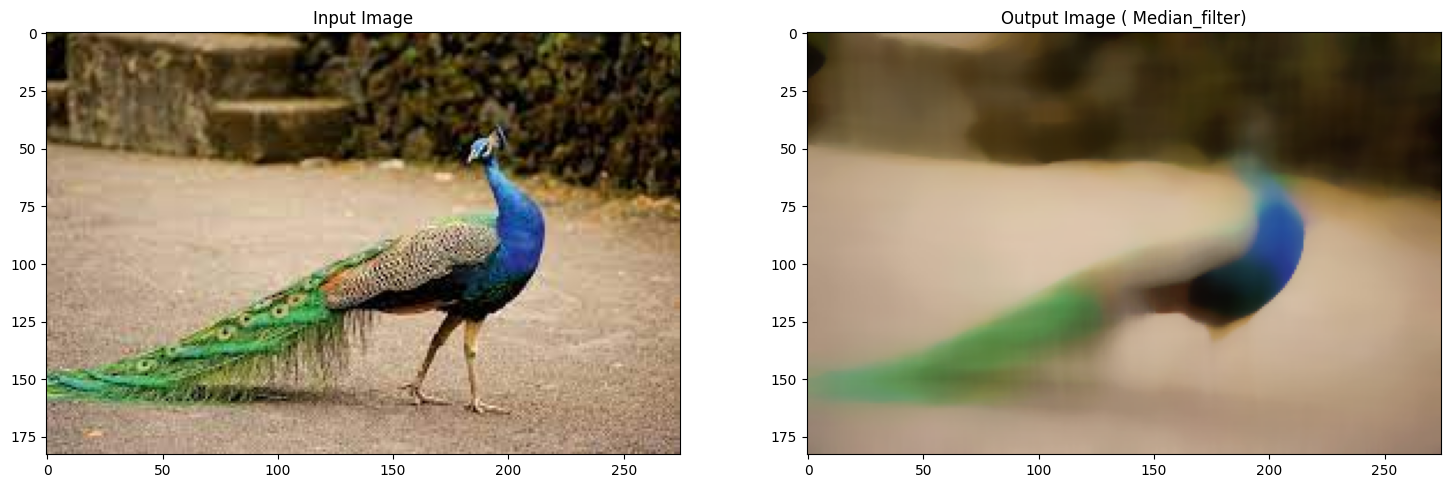

In [12]:
# Display the images.

plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(image [:, :, ::-1]); plt.title('Input Image')
plt.subplot(122); plt.imshow(median_filter[:, :, ::-1]); plt.title('Output Image ( Median_filter)')

# 2. Sharpening Filters

In [13]:
# i) Using Laplacian Kernel (Manual Kernel)
laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]])
sharpened_laplacian_kernel = cv2.filter2D(image, -1, kernel = laplacian_kernel)

Text(0.5, 1.0, 'Output Image ( Laplacian_filter)')

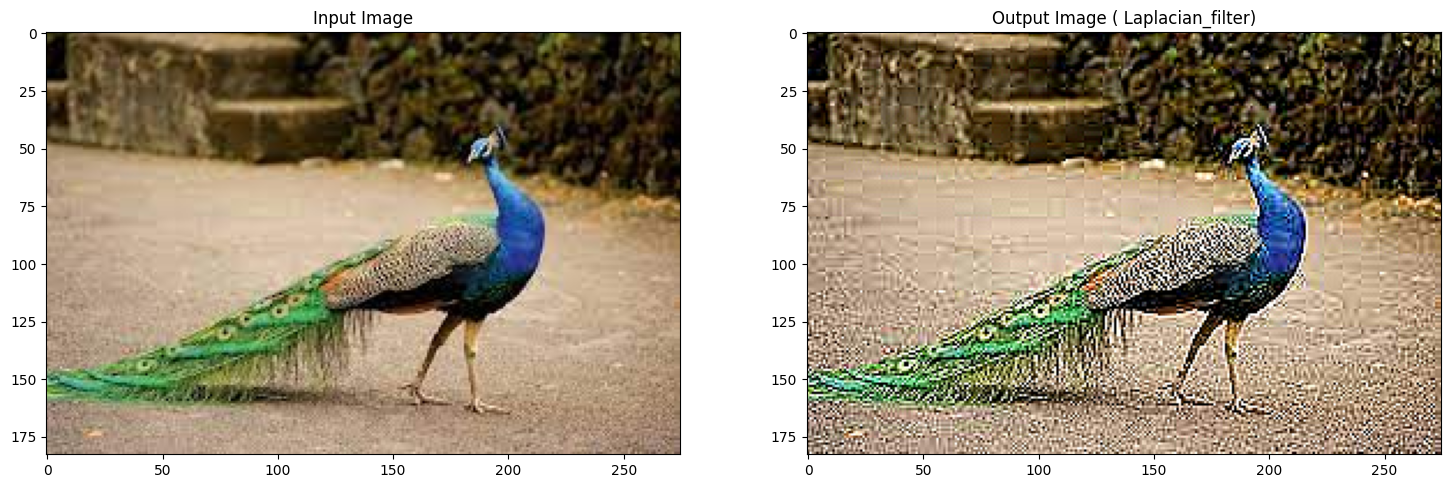

In [14]:
# Display the images.

plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(image [:, :, ::-1]); plt.title('Input Image')
plt.subplot(122); plt.imshow(sharpened_laplacian_kernel[:, :, ::-1]); plt.title('Output Image ( Laplacian_filter)')

In [15]:
# ii) Using Laplacian Operator (OpenCV built-in)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
laplacian_operator = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian_operator = np.uint8(np.absolute(laplacian_operator))

Text(0.5, 1.0, 'Output Image ( Laplacian_filter)')

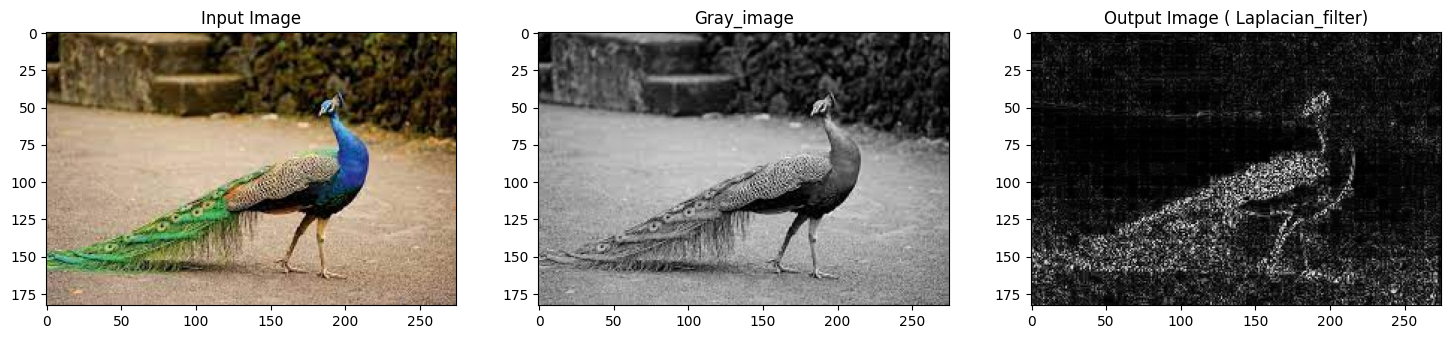

In [16]:
# Display the images.

plt.figure(figsize = (18, 6))
plt.subplot(131); plt.imshow(image [:, :, ::-1]); plt.title('Input Image')
plt.subplot(132); plt.imshow(gray_image, cmap='gray'); plt.title('Gray_image')
plt.subplot(133); plt.imshow(laplacian_operator,cmap='gray'); plt.title('Output Image ( Laplacian_filter)')

# Pencil Sketch Filter

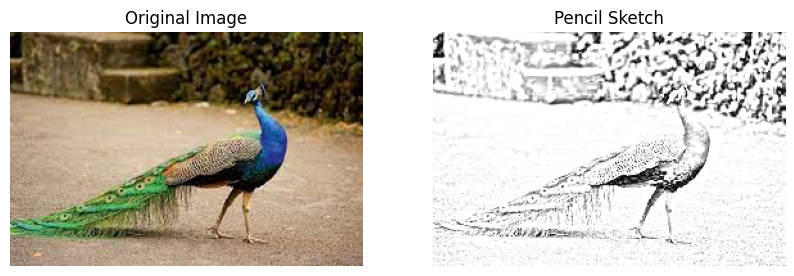

In [17]:
image = cv2.imread('peacock.jpeg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
inverted_image = 255 - gray_image
blurred_image = cv2.GaussianBlur(inverted_image, (21, 21), 0)
pencil_sketch = cv2.divide(gray_image, 255 - blurred_image, scale=256)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(pencil_sketch, cmap='gray'), plt.title("Pencil Sketch"), plt.axis('off')
plt.show()


In [18]:
sketch_gray, sketch_color = cv2.pencilSketch(image, sigma_s=60, sigma_r=0.07, shade_factor=0.2)

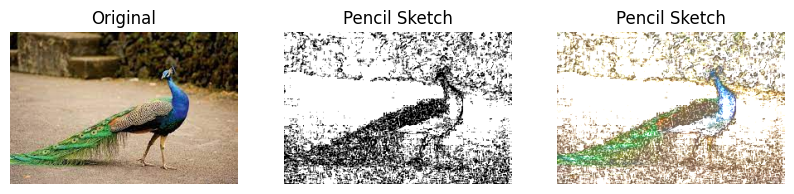

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(131); plt.imshow(image[:,:,::-1]); plt.title("Original"); plt.axis('off')
plt.subplot(132); plt.imshow(sketch_gray, cmap='gray'); plt.title("Pencil Sketch"); plt.axis('off')
plt.subplot(133); plt.imshow(sketch_color[:,:,::-1]); plt.title("Pencil Sketch"); plt.axis('off')
plt.show()